In [23]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
import numpy as np
import mglearn

Text(0,0.5,'feature 2')

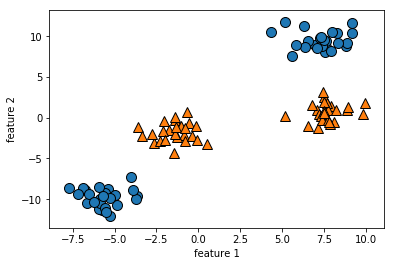

In [14]:
X, y = make_blobs(centers = 4, random_state = 8)
y = y%2

mglearn.discrete_scatter(X[:,0], X[:, 1], y)
plt.xlabel('feature 1')
plt.ylabel('feature 2')

#### blob_data cannot be classified with linear line

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0,0.5,'feature 1')

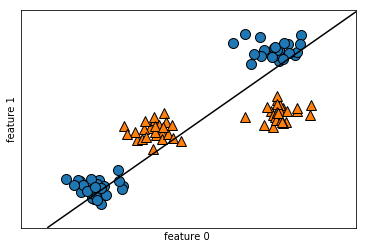

In [21]:
linear_svm = LinearSVC().fit(X,y)
mglearn.plots.plot_2d_separator(linear_svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('feature 0 ')
plt.ylabel('feature 1')

#### Then, expand the number of features into 3. 
<br> Add extra feature using `X[:,1]**2`

Text(0.5,0,'feature2')

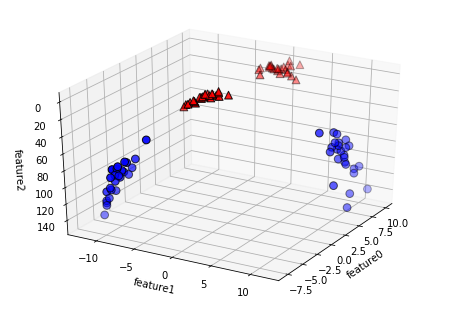

In [86]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

X_new = np.hstack([X, X[:,1:]**2])

figure = plt.figure()
ax = Axes3D(figure, elev = -150, azim = -30) #3d graph

label0 = y ==0
ax.scatter(X_new[label0, 0], X_new[label0, 1], X_new[label0, 2], c = 'b', cmap = mglearn.cm2, s =60, edgecolor = 'k')
ax.scatter(X_new[~label0, 0], X_new[~label0, 1], X_new[~label0, 2], c = 'r', marker = '^',cmap = mglearn.cm2, s =60, edgecolor = 'k')
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature2')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


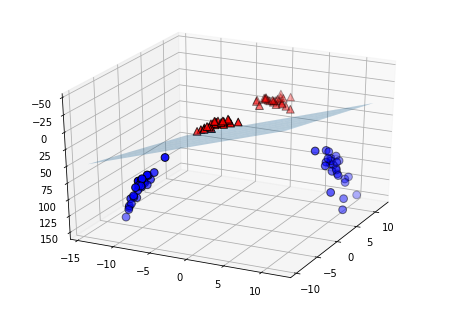

In [106]:
linear_svm_3d = LinearSVC().fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev = -152, azim = -26)
xx = np.linspace(X_new[:,0].min() - 2, X_new[:,0].max() + 2, 50)
yy = np.linspace(X_new[:,1].min() - 2, X_new[:,0].max() + 2, 50)

XX, YY =np.meshgrid(xx,yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

ax.plot_surface(XX,YY,ZZ,rstride = 8, cstride = 8, alpha = .3)
ax.scatter(X_new[label0, 0], X_new[label0, 1], X_new[label0, 2], c = 'b', cmap = mglearn.cm2, s =60, edgecolor = 'k')
ax.scatter(X_new[~label0, 0], X_new[~label0, 1], X_new[~label0, 2], c = 'r', marker = '^',cmap = mglearn.cm2, s =60, edgecolor = 'k')

### Decision Boundary

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'alhpa'
  s)


Text(0,0.5,'feature 1')

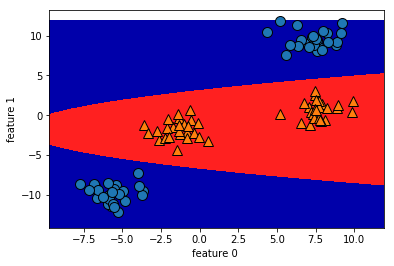

In [107]:
ZZ = YY **2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels = [dec.min(), 0,dec.max()],cmap = mglearn.cm2, alhpa = .5)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel('feature 0 ')
plt.ylabel('feature 1')

In [108]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

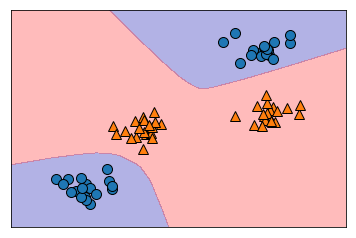

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 4)
mlp = MLPClassifier(solver = 'lbfgs', random_state = 0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill = True, alpha = .3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)